In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def plot_validation_results(data_list, show_best=False):
    colors = sns.color_palette("husl", len(data_list))
    sns.set(style="darkgrid")
    _, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    for i, (label, data) in enumerate(data_list.items()):
        epochs = [int(d['epoch']) for d in data]
        losses = [d['loss'] for d in data]
        accs = [d['acc'] for d in data]

        # Plot the losses
        ax1.plot(epochs, losses, color=colors[i], marker='o', label=label)
        ax1.set_title('Loss per Epoch')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.set_xticks(epochs)
        ax1.tick_params(axis='both', which='major', labelsize=12)

        # Plot the accuracies
        ax2.plot(epochs, accs, color=colors[i], marker='s', label=label)
        ax2.set_title('Accuracy per Epoch')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.set_xticks(epochs)
        ax2.tick_params(axis='both', which='major', labelsize=12)

        if show_best:
            model = label.split(" ")
            min_loss_epoch = epochs[losses.index(min(losses))]
            ax1.axvline(min_loss_epoch, linestyle='--', color='black', linewidth=1, alpha=0.5)
            ax1.text(min_loss_epoch + 0.1, max(losses), f"Loss ({model[0]}): {min(losses):.4f}", fontsize=12)
            
            max_acc_epoch = epochs[accs.index(max(accs))]
            ax2.axvline(max_acc_epoch, linestyle='--', color='black', linewidth=1, alpha=0.5)
            ax2.text(max_acc_epoch + 0.1, min(accs), f"Accuracy ({model[0]}): {max(accs):.4f}", fontsize=12)

    ax1.legend()
    ax2.legend()
    plt.tight_layout(pad=3)
    plt.show()


In [10]:
data_list = {}

json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Clean/lightning_logs/detoxify/checkpoints/converted/model_validation.json'
with open(json_path, 'r') as f:
    data_list['Detoxify Primary Model'] = json.load(f)

# json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/version_2/checkpoints/converted/model_validation.json'
# with open(json_path, 'r') as f:
#     data_list['Blank Topic 6 Model'] = json.load(f)

json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Clean/lightning_logs/blank/checkpoints/converted/model_validation.json'
with open(json_path, 'r') as f:
    data_list['Blank Primary Model'] = json.load(f)

# json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Clean/lightning_logs/version_1/checkpoints/converted/model_validation.json'
# with open(json_path, 'r') as f:
#     data_list['Blank Primary Model'] = json.load(f)


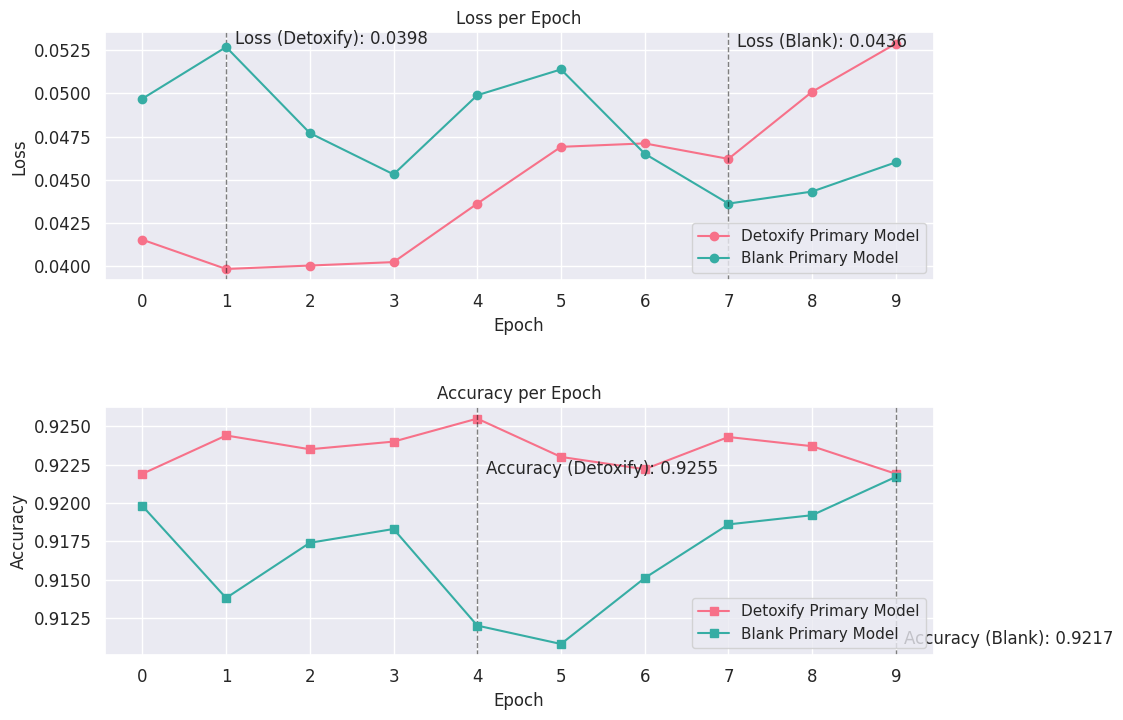

In [11]:
plot_validation_results(data_list, show_best=True)